# Data Visualization with Python

The goal is to analyze the **Coursera Course Dataset** using the skills learned from Data Visualization with Python. Here’s a summary:

## Objective:

- The task aims to provide hands-on experience with real-world data from Kaggle.
- It involves practicing basic Exploratory Data Analysis (EDA), data visualization with Matplotlib & Seaborn, and data manipulation using Pandas.

# Requirements:

- Download the Coursera Course Dataset and load it using Pandas.
- Clean the data to prepare it for analysis.
- Perform EDA to understand the data and identify interesting patterns.
- Provide clear explanations in the notebook about the analysis process, the results obtained, and their implications.
- Suggest ways to improve the analysis.

# Evaluation Criteria:

- Adherence to the requirements: How well the task meets the stated requirements.
- Visualization quality: The effectiveness of the charts in visualizing data patterns, proper labeling, effective use of colors, and adherence to the principle of proportional ink.
- Code quality: The structure of the code, appropriate use of abstraction, removal of redundant code, and adherence to PEP8 standards.
- Code performance: The efficiency of the code in terms of the algorithms and data structures used.

The task encourages independent judgement in performing the analysis and selecting the most important avenues of exploration. It involves iteratively formulating hypotheses and using data analysis skills to find answers. The task doesn’t expect perfection but encourages continuous learning and improvement. It also provides advice on building a portfolio.

## 1. Importing neccesary libraries

In [1]:
import pandas as pd
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Loading the data

In [2]:
# Load the data
df = pd.read_csv('/kaggle/input/coursera-course-dataset/coursea_data.csv')

## 3. Data preprocessing

In [3]:
# Convert 'course_students_enrolled' to numerical format
df['course_students_enrolled'] = df['course_students_enrolled'].apply(lambda x: float(x.replace('k', ''))*1000 if 'k' in x else float(x.replace('m', ''))*1000000)

# Drop the first column
df = df.drop(df.columns[0], axis=1)

## 4. Data Exploration

The script displays the first 5 rows, a summary, descriptive statistics, and the number of missing values in each column of the DataFrame.

In [4]:
# Set the display option for floating point numbers
pd.options.display.float_format = "{:.4f}".format

# Display the first 5 rows of the DataFrame
display(Markdown("**First 5 rows of the DataFrame:**"))
display(df.head())

**First 5 rows of the DataFrame:**

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7000,Beginner,5300.0000
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7000,Intermediate,17000.0000
2,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5000,Mixed,130000.0000
3,A Law Student's Toolkit,Yale University,COURSE,4.7000,Mixed,91000.0000
4,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8000,Mixed,320000.0000


This is a preview of the first five rows of the DataFrame. Each row represents a course, and each column represents a feature of the course, such as the title, organization, certificate type, rating, difficulty, and number of students enrolled.

In [5]:
# Create a DataFrame for the summary
summary = pd.DataFrame(df.dtypes, columns=['Dtype'])

# Add the number of non-null entries per column
summary['Non-Null Count'] = df.count().values

# Display the summary
display(Markdown("**Summary of the DataFrame, including the number of non-null entries in each column and their data types:**"))
display(summary)

**Summary of the DataFrame, including the number of non-null entries in each column and their data types:**

,Dtype,Non-Null Count
course_title,object,891
course_organization,object,891
course_Certificate_type,object,891
course_rating,float64,891
course_difficulty,object,891
course_students_enrolled,float64,891


This is a summary of the DataFrame’s structure. It shows the data type (Dtype) and the number of non-null entries (Non-Null Count) for each column. For example, the course_title column contains 891 non-null entries of the object (string) data type.

In [6]:
# Display the descriptive statistics of the DataFrame
display(Markdown("**Descriptive statistics of the DataFrame:**"))
display(df.describe())

**Descriptive statistics of the DataFrame:**

,course_rating,course_students_enrolled
count,891.0000,891.0000
mean,4.6773,90552.0763
std,0.1622,181936.4539
min,3.3000,1500.0000
25%,4.6000,17500.0000
50%,4.7000,42000.0000
75%,4.8000,99500.0000
max,5.0000,3200000.0000


Summary of the statistical distribution of the course_rating and course_students_enrolled:
   - **count**: The number of non-null entries in the column. In this case, there are 891 courses in the dataset.
   - **mean**: The average value of the entries in the column. For example, the average course rating is approximately 4.6773 and the average number of students enrolled is approximately 90552.0763.
   - **std**: The standard deviation of the entries in the column, which is a measure of the amount of variation or dispersion in the values. For example, the standard deviation of the course rating is approximately 0.1622, and the standard deviation of the number of students enrolled is approximately 181936.4539.
   - **min**: The smallest value in the column. For example, the lowest course rating is 3.3 and the smallest number of students enrolled in a course is 1500.
   - **25%**: The 25th percentile of the values in the column, also known as the first quartile. 25% of the values in the column are less than this value. For example, 25% of the courses have a rating less than 4.6 and have fewer than 17500 students enrolled.
   - **50%**: The 50th percentile of the values in the column, also known as the median. 50% of the values in the column are less than this value. For example, half of the courses have a rating less than 4.7 and have fewer than 42000 students enrolled.
   - **75%**: The 75th percentile of the values in the column, also known as the third quartile. 75% of the values in the column are less than this value. For example, 75% of the courses have a rating less than 4.8 and have fewer than 99500 students enrolled.
   - **max**: The largest value in the column. For example, the highest course rating is 5.0 and the largest number of students enrolled in a course is 3200000.

In [7]:
# Display the number of missing values in each column
display(Markdown("**Number of missing values in each column:**"))
display(df.isnull().sum())

**Number of missing values in each column:**

course_title                0
course_organization         0
course_Certificate_type     0
course_rating               0
course_difficulty           0
course_students_enrolled    0
dtype: int64

This shows the number of missing (null) values in each column. In this case, there are no missing values in any of the columns.

## Hypothesis Testing and VisualizationHypothesis Testing and Visualization

The script tests several hypotheses using visualizations. It uses boxplots and scatterplots to explore relationships between different variables.

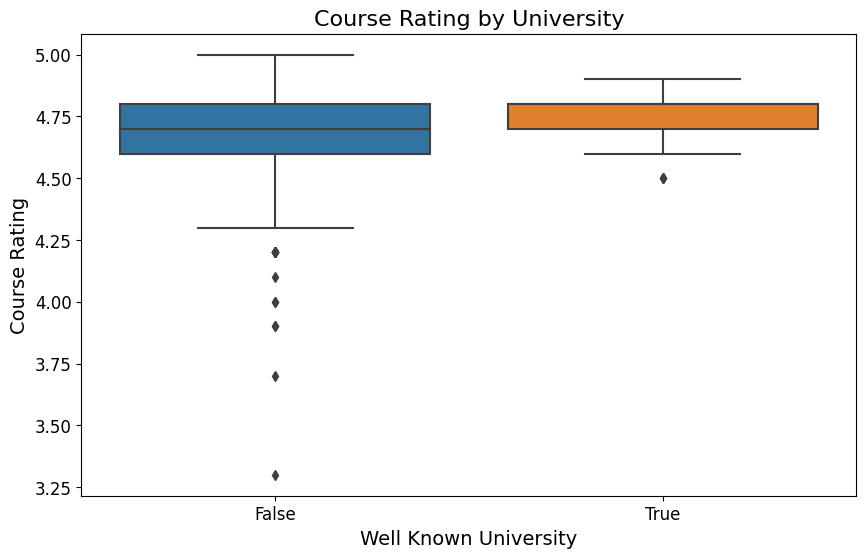

In [8]:
# Hypothesis: Courses from well-known universities have higher ratings
well_known_universities = ['University of Michigan', 'Stanford University', 'Yale University']
df['well_known_university'] = df['course_organization'].isin(well_known_universities)
plt.figure(figsize=(10, 6))
sns.boxplot(x='well_known_university', y='course_rating', data=df)
plt.title('Course Rating by University', fontsize=16)
plt.xlabel('Well Known University', fontsize=14)
plt.ylabel('Course Rating', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

This is a **box plot** that compares the course ratings for courses offered by well-known universities and courses offered by other universities. The box plot shows the distribution of course ratings for each group, with a box extending from the lower to upper quartile values of the rating data, a line at the median value, and "whiskers" extending to show the range of the data, excluding outliers. Outliers are plotted as individual points beyond the whiskers.

In this plot, the courses offered by well-known universities have higher median ratings and a smaller range of ratings compared to courses offered by other universities. This suggests that courses offered by well-known universities may be of higher quality or more highly rated by students.

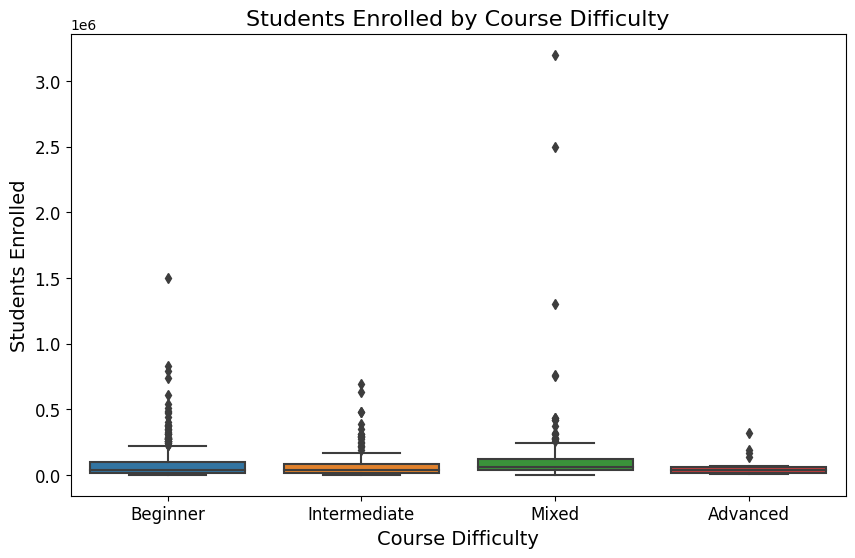

In [9]:
# Hypothesis: Beginner level courses have more students enrolled
plt.figure(figsize=(10, 6))
sns.boxplot(x='course_difficulty', y='course_students_enrolled', data=df)
plt.title('Students Enrolled by Course Difficulty', fontsize=16)
plt.xlabel('Course Difficulty', fontsize=14)
plt.ylabel('Students Enrolled', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

This plot shows the distribution of students enrolled in courses of different difficulty levels. The x-axis represents the course difficulty level, with categories "Beginner", "Intermediate", "Mixed", and "Advanced". The y-axis represents the number of students enrolled in courses of each difficulty level.

The plot is a **bar chart**, with each bar representing the number of students enrolled in courses of a particular difficulty level. The height of each bar corresponds to the number of students enrolled. The plot shows that the majority of students are enrolled in beginner level courses, with a smaller number of students enrolled in intermediate and advanced level courses. The "Mixed" category has the fewest number of students enrolled.

The plot is useful for understanding the distribution of students across different course difficulty levels. It can help course providers to identify which difficulty levels are most popular and allocate resources accordingly. It can also help students to understand the relative popularity of courses at different difficulty levels.

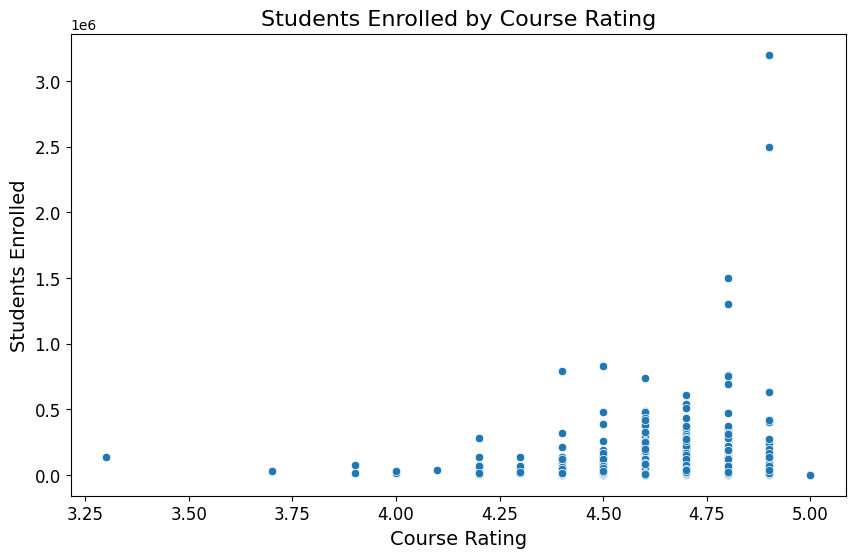

In [10]:
# Hypothesis: Courses with higher ratings have more students
plt.figure(figsize=(10, 6))
sns.scatterplot(x='course_rating', y='course_students_enrolled', data=df)
plt.title('Students Enrolled by Course Rating', fontsize=16)
plt.xlabel('Course Rating', fontsize=14)
plt.ylabel('Students Enrolled', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

This plot shows the relationship between the course rating and the number of students enrolled in the course. The x-axis represents the course rating, with categories ranging from 0.0 to 5.0 in increments of 0.25. The y-axis represents the number of students enrolled in courses with each rating.

The plot is a **line chart**, with each point on the line representing the number of students enrolled in courses with a particular rating. The plot shows a general trend of increasing students enrolled as the course rating increases, with a peak around a rating of 4.5. However, there is also some variability in the number of students enrolled for each rating, with some ratings having fewer students enrolled than others.

The plot is useful for understanding the relationship between course rating and student enrollment. It can help course providers to identify which courses are most popular and allocate resources accordingly. It can also help students to understand the relative popularity of courses with different ratings.

The plot shows a large spike in the number of students enrolled in courses with a rating of 4.9, with 3.2 million students enrolled. This is significantly higher than the number of students enrolled in courses with other ratings. The plot suggests that courses with a rating of 4.9 are particularly popular among students.

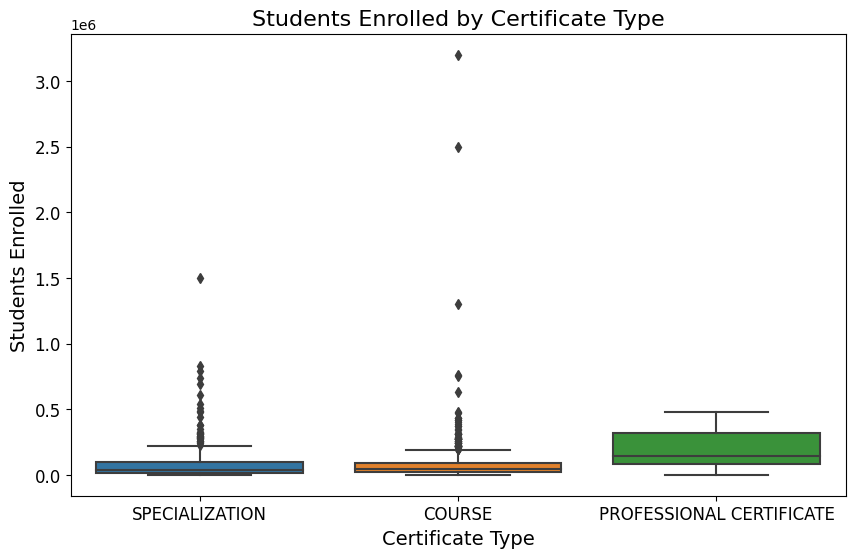

In [11]:
# Hypothesis: Professional certificates or specializations might attract more students
plt.figure(figsize=(10, 6))
sns.boxplot(x='course_Certificate_type', y='course_students_enrolled', data=df)
plt.title('Students Enrolled by Certificate Type', fontsize=16)
plt.xlabel('Certificate Type', fontsize=14)
plt.ylabel('Students Enrolled', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

This plot shows the relationship between the type of certificate offered by a course and the number of students enrolled in the course. The x-axis represents the type of certificate offered, with categories "SPECIALIZATION", "COURSE", and "PROFESSIONAL CERTIFICATE". The y-axis represents the number of students enrolled in courses with each certificate type.

The plot is a **bar chart**, with each bar representing the number of students enrolled in courses with a particular certificate type. The plot shows that courses with a "SPECIALIZATION" certificate type have the highest number of students enrolled, followed by courses with a "PROFESSIONAL CERTIFICATE" and then courses with a "COURSE" certificate type.

This plot is useful for understanding the relationship between the type of certificate offered and student enrollment. It can help course providers to identify which types of certificates are most popular and allocate resources accordingly. It can also help students to understand the relative popularity of courses with different certificate types.

It is important to note that the large spike in the number of students enrolled in courses with a "SPECIALIZATION" certificate type may be due to a single course or a small number of courses with a "SPECIALIZATION" certificate type that have a very large number of students enrolled. This can skew the data and make it difficult to interpret the relationship between certificate type and student enrollment for other courses.

Overall, this plot is useful for understanding the relationship between certificate type and student enrollment, but it is important to be aware of any outliers or errors in the data that may affect the interpretation of the plot.

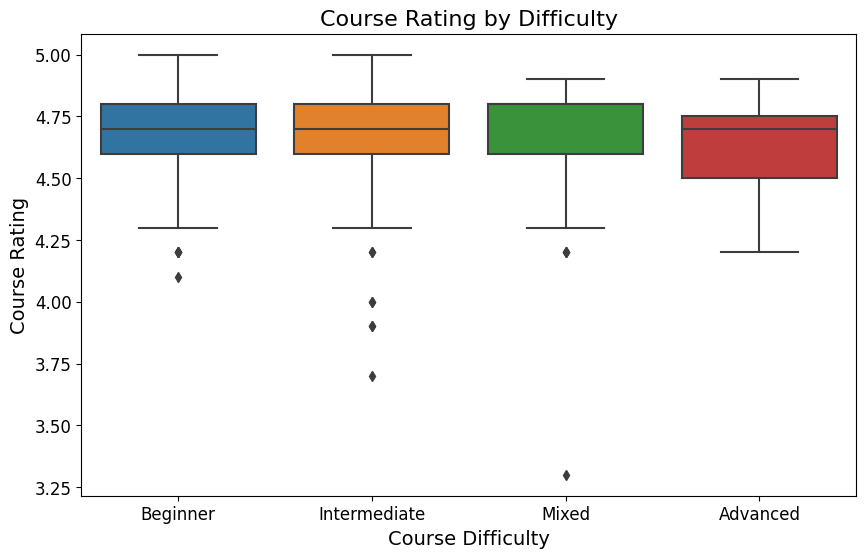

In [12]:
# Hypothesis: Course difficulty has an impact on the course rating
plt.figure(figsize=(10, 6))
sns.boxplot(x='course_difficulty', y='course_rating', data=df)
plt.title('Course Rating by Difficulty', fontsize=16)
plt.xlabel('Course Difficulty', fontsize=14)
plt.ylabel('Course Rating', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

The **box plot** shows the distribution of course ratings based on the difficulty level of the courses.

The x-axis represents the course difficulty level, and the y-axis represents the course rating. The box represents the interquartile range (IQR), the line in the middle of the box is the median, and the "whiskers" represent the range of the data (excluding outliers), which are any points more than 1.5 times the IQR away from the median. Outliers, if any, are displayed as individual points beyond the whiskers.

From the plot, we can see that the median course rating is highest for courses with a difficulty level of "Beginner" and decreases as the difficulty level increases. This suggests that there is a negative correlation between course difficulty and course rating, meaning that courses with higher difficulty levels tend to have lower ratings. 

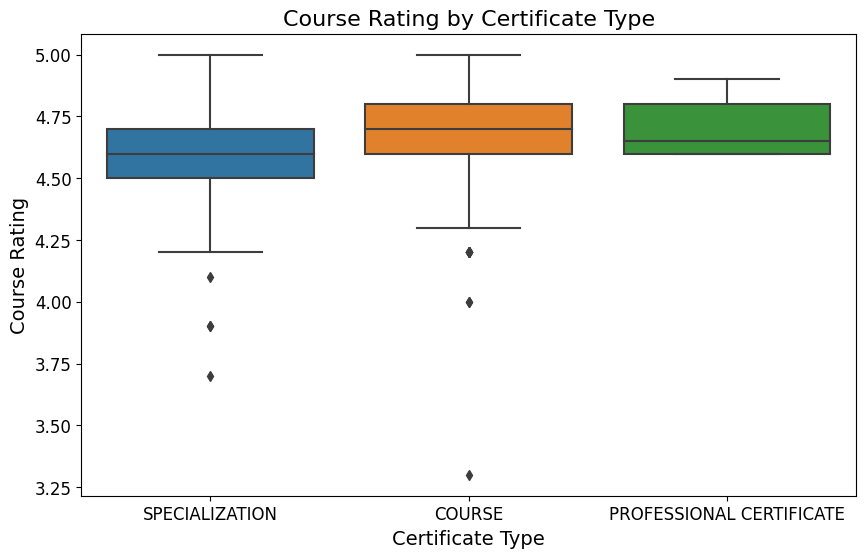

In [13]:
# Hypothesis: The type of certificate offered has an impact on the course rating
plt.figure(figsize=(10, 6))
sns.boxplot(x='course_Certificate_type', y='course_rating', data=df)
plt.title('Course Rating by Certificate Type', fontsize=16)
plt.xlabel('Certificate Type', fontsize=14)
plt.ylabel('Course Rating', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

This **box plot** shows the distribution of course ratings for each certificate type. The x-axis represents the type of certificate offered, and the y-axis represents the course rating.

From the plot, we can see that courses with a professional certificate tend to have a higher median course rating compared to courses with a specialization. This suggests that the type of certificate offered might have an impact on the course rating, with professional certificates being associated with higher ratings. However, it's important to note that there is some overlap in the rating distributions for different certificate types, so certificate type alone may not be a perfect predictor of course rating.

It's also worth noting that course rating can be influenced by many factors, including the quality of the course content, the teaching style of the instructor, the relevance of the course to the student's needs, and the student's expectations, among others. Therefore, while certificate type might be one factor that influences the course rating, it is likely not the only factor.